In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("household_power_consumption.csv")



In [6]:
# data['Date'] = data['Date'].astype('str')
# data['Time'] = data['Time'].astype('str')
# data['Date'] = data['Date'] + ' '+ data['Time']

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16-12-2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y" )
# data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y" )
data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data = data.assign(Date=data.Date.dt.round('H'))
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
data = data.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')

data.head()

,index,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,
2006-12-16,1970-01-01 00:00:00.000000395,23:59:00,2.586,0.070,241.630,11.000,0.000,1.000,0.0
2006-12-17,1970-01-01 00:00:00.000001835,23:59:00,0.276,0.120,244.890,1.200,0.000,1.000,0.0
2006-12-18,1970-01-01 00:00:00.000003275,23:59:00,0.434,0.248,241.270,2.000,0.000,2.000,0.0
2006-12-19,1970-01-01 00:00:00.000004715,23:59:00,0.448,0.052,245.680,1.800,0.000,0.000,0.0
2006-12-20,1970-01-01 00:00:00.000006155,23:59:00,1.888,0.220,243.050,7.800,0.000,0.000,18.0


In [10]:
data = data['Global_active_power']

data.columns = ['Energy Production']
data = data[data != '?']
data = data.astype('float64')

train = data[:int((70*len(data)/100))]
valid = data[int((70*len(data)/100)):]
data.head()


Date
2006-12-16    2.586
2006-12-17    0.276
2006-12-18    0.434
2006-12-19    0.448
2006-12-20    1.888
Name: Global_active_power, dtype: float64

In [11]:
len(data)

1427

In [12]:
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data.iplot(title="power")

In [13]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=50)
pyplot.show()

<Figure size 640x480 with 1 Axes>

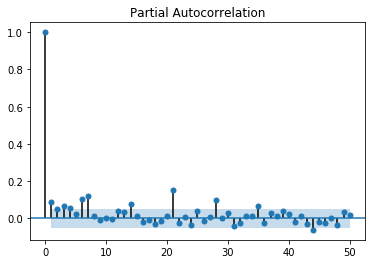

In [14]:

plot_pacf(data, lags=50)
pyplot.show()

In [15]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposed = seasonal_decompose(data, model='additive', freq=12)
# x = decomposed.plot() #See note below about this

In [16]:
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, m=12)
model.fit(train)

# forecast = model.predict(n_periods=len(valid))
# forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=3108.264, BIC=3118.073, Fit time=0.284 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2830.875, BIC=2850.494, Fit time=0.600 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2477.533, BIC=2497.152, Fit time=1.468 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=2479.075, BIC=2503.599, Fit time=4.724 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=2475.558, BIC=2490.273, Fit time=0.367 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=2476.961, BIC=2496.580, Fit time=0.371 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=2476.985, BIC=2496.604, Fit time=0.444 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [17]:
future_forecast = model.predict(n_periods=len(valid))
future_forecast


array([0.45537021, 0.45453437, 0.45369854, 0.4528627 , 0.45202687,
       0.45119104, 0.4503552 , 0.44951937, 0.44868353, 0.4478477 ,
       0.44701186, 0.44617603, 0.44534019, 0.44450436, 0.44366852,
       0.44283269, 0.44199685, 0.44116102, 0.44032519, 0.43948935,
       0.43865352, 0.43781768, 0.43698185, 0.43614601, 0.43531018,
       0.43447434, 0.43363851, 0.43280267, 0.43196684, 0.43113101,
       0.43029517, 0.42945934, 0.4286235 , 0.42778767, 0.42695183,
       0.426116  , 0.42528016, 0.42444433, 0.42360849, 0.42277266,
       0.42193682, 0.42110099, 0.42026516, 0.41942932, 0.41859349,
       0.41775765, 0.41692182, 0.41608598, 0.41525015, 0.41441431,
       0.41357848, 0.41274264, 0.41190681, 0.41107097, 0.41023514,
       0.40939931, 0.40856347, 0.40772764, 0.4068918 , 0.40605597,
       0.40522013, 0.4043843 , 0.40354846, 0.40271263, 0.40187679,
       0.40104096, 0.40020512, 0.39936929, 0.39853346, 0.39769762,
       0.39686179, 0.39602595, 0.39519012, 0.39435428, 0.39351

In [18]:
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])


In [19]:
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).iplot()

In [20]:
pd.concat([data,future_forecast],axis=1).iplot()


In [21]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,future_forecast))
print(rms)

0.7773602666710409
